# pca Concept

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv("data.csv")
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [3]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [4]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [5]:
df=data.copy()

In [6]:
df=df.drop(["id","Unnamed: 32"],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
df["diagnosis"]=df["diagnosis"].map({"M":1,"B":0})

In [10]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
# FIRST IMP STEP BEFORE PCA-- Standarization of the dataset

In [11]:
X=df.drop("diagnosis",axis=1)
Y=df["diagnosis"]

In [12]:
scaler=StandardScaler()

In [13]:
X_scaled=scaler.fit(X)
X_scaled

StandardScaler()

In [14]:
X_scaled=X_scaled.transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [16]:
X_df=pd.DataFrame(X_scaled,columns=X.columns)
X_df.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [17]:
X_df.shape

(569, 30)

In [ ]:
# find the accuracy keeping all columns

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X_df,Y,test_size=0.2,random_state=100,stratify=Y)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf=RandomForestClassifier()

In [23]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
rf.score(X_test,Y_test)

0.9649122807017544

In [ ]:
# apply the PCA

In [28]:
X_df.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [29]:
X_df.shape

(569, 30)

In [ ]:
from sklearn.decomposition import PCA

In [26]:
pca1=PCA()

In [30]:
X_pca=pca1.fit(X_df)

In [31]:
X_pca

PCA()

In [ ]:
# how much information column wise(principal component )

In [32]:
X_pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [33]:
np.sum(X_pca.explained_variance_ratio_)

1.0

In [ ]:
# to find the information contained in no. of principal componenets , plot a grap

Text(0, 0.5, 'amout of information or explained variance raio')

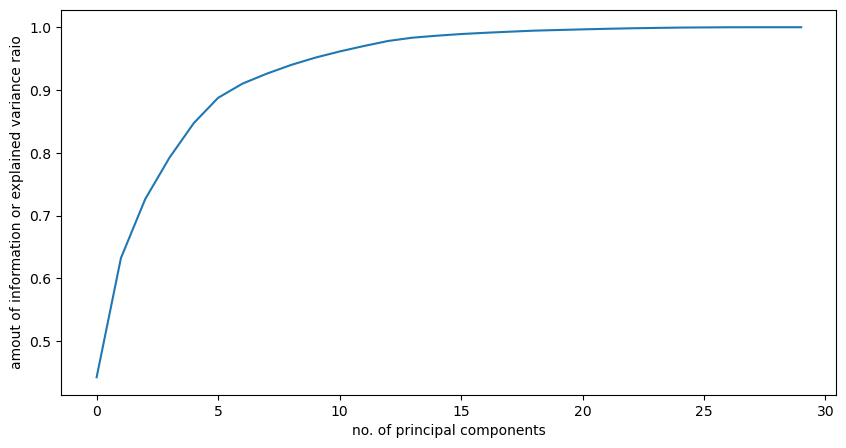

In [34]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(X_pca.explained_variance_ratio_))

plt.xlabel("no. of principal components")
plt.ylabel("amout of information or explained variance raio")

In [35]:
pca15=PCA(n_components=15)
X_pca15=pca15.fit_transform(X_df)

In [37]:
information=pca15.explained_variance_ratio_
np.sum(information)

0.9864881227144471

In [38]:
X_pca15

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
         1.03387570e-01, -6.90802465e-01, -6.01788736e-01],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
        -9.43529416e-01, -6.53475870e-01,  8.97534110e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
        -4.10626617e-01,  1.66795667e-02,  4.83419539e-01],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         1.57417970e-01,  2.85690940e-01,  9.09976931e-02],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         1.22519477e+00,  2.18698490e-01,  2.29595006e-01],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
         6.78897779e-01, -1.17072633e+00,  2.17336453e-01]])

In [39]:
X_pca_df=pd.DataFrame(X_pca15)

In [40]:
X_pca_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262956,-0.859015,0.103388,-0.690802,-0.601789
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653476,0.008975


In [41]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_pca_df,Y,test_size=0.2,random_state=100,stratify=Y)

In [42]:
rf.fit(X_train1,Y_train1)

RandomForestClassifier()

In [43]:
rf.score(X_test1,Y_test1)

0.9385964912280702

In [46]:
Y_pred_pca=rf.predict(X_test1)

In [47]:
print(classification_report(Y_test1,Y_pred_pca))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        72
           1       0.87      0.98      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
# how to calculate the eigen value,eigen vector ,principal components

In [48]:
X_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
#step 1 calculate the covariance matrix

In [49]:
cov_matrix=X_df.cov()
cov_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.001761,0.324352,0.999612,0.989095,0.170882,0.507015,0.677955,0.823977,0.148001,-0.312179,0.680286,-0.097489,0.675359,0.737159,-0.222992,0.206363,0.194546,0.376831,-0.104505,-0.042716,0.971246,0.297531,0.966836,0.942739,0.119827,0.414191,0.527839,0.745524,0.164242,0.007078
texture_mean,0.324352,1.001761,0.330113,0.321651,-0.023430,0.237119,0.302950,0.293981,0.071527,-0.076572,0.276354,0.387038,0.282169,0.260302,0.006625,0.192313,0.143545,0.164139,0.009143,0.054553,0.353194,0.913650,0.358670,0.344151,0.077640,0.278319,0.301555,0.295836,0.105193,0.119415
perimeter_mean,0.999612,0.330113,1.001761,0.988244,0.207643,0.557917,0.717396,0.852475,0.183349,-0.261937,0.692983,-0.086914,0.694355,0.746294,-0.203051,0.251185,0.228484,0.407934,-0.081773,-0.005533,0.971183,0.303572,0.972095,0.943207,0.150814,0.456577,0.564872,0.772599,0.189448,0.051108
area_mean,0.989095,0.321651,0.988244,1.001761,0.177340,0.499379,0.687191,0.824718,0.151559,-0.283608,0.733852,-0.066397,0.727908,0.801495,-0.167070,0.212957,0.208026,0.372976,-0.072624,-0.019922,0.964441,0.287995,0.960808,0.960902,0.123740,0.391098,0.513508,0.723288,0.143823,0.003744
smoothness_mean,0.170882,-0.023430,0.207643,0.177340,1.001761,0.660284,0.522903,0.554670,0.558757,0.585822,0.301998,0.068527,0.296613,0.246987,0.332961,0.319505,0.248833,0.381346,0.201128,0.284106,0.213495,0.036135,0.239273,0.207082,0.806742,0.473300,0.435691,0.503939,0.395004,0.500195
compactness_mean,0.507015,0.237119,0.557917,0.499379,0.660284,1.001761,0.884675,0.832598,0.603702,0.566364,0.498349,0.046286,0.549872,0.456455,0.135537,0.740022,0.571521,0.643393,0.230381,0.508211,0.536258,0.248570,0.591250,0.510501,0.566537,0.867333,0.817712,0.817009,0.511122,0.688593
concavity_mean,0.677955,0.302950,0.717396,0.687191,0.522903,0.884675,1.001761,0.923013,0.501548,0.337376,0.633037,0.076353,0.661553,0.618514,0.098737,0.671459,0.692487,0.684463,0.178323,0.450092,0.689448,0.300407,0.730849,0.677177,0.449612,0.756297,0.885659,0.862839,0.410185,0.515836
concave points_mean,0.823977,0.293981,0.852475,0.824718,0.554670,0.832598,0.923013,1.001761,0.463312,0.167211,0.699279,0.021517,0.711901,0.691514,0.027702,0.491288,0.439940,0.616718,0.095519,0.258037,0.831779,0.293267,0.857430,0.811055,0.453550,0.668629,0.753724,0.911758,0.376406,0.369310
symmetry_mean,0.148001,0.071527,0.183349,0.151559,0.558757,0.603702,0.501548,0.463312,1.001761,0.480766,0.303913,0.128278,0.314445,0.224365,0.187651,0.422402,0.343230,0.393990,0.449927,0.332370,0.186055,0.090810,0.219554,0.177505,0.427426,0.474033,0.434485,0.431054,0.701058,0.439185
fractal_dimension_mean,-0.312179,-0.076572,-0.261937,-0.283608,0.585822,0.566364,0.337376,0.167211,0.480766,1.001761,0.000111,0.164463,0.039900,-0.090329,0.402672,0.560822,0.447417,0.341799,0.345615,0.689343,-0.254138,-0.051359,-0.205512,-0.232263,0.505831,0.459606,0.346843,0.175634,0.334607,0.768648


In [50]:
cov_matrix.shape

(30, 30)

In [ ]:
#step calcualte the eigen value, eigen vector

In [ ]:
#numpy.linalg.eig()----> returns eigen value and eigen vector

In [51]:
eigen_value,eigen_vector=np.linalg.eig(cov_matrix)

In [52]:
eigen_value

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [53]:
len(eigen_value)

30

In [54]:
eigen_vector

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02, -5.11187749e-02,
         1.50583883e-01, -2.02924255e-01, -1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02, -1.07922421e-01,
         1.57841960e-01,  3.87061187e-02,  4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

In [55]:
len(eigen_vector)

30

In [56]:
sorted_key=np.argsort(eigen_value)

In [57]:
sorted_key

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 28, 18, 17, 16, 15, 14, 13,
       12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0], dtype=int64)

In [ ]:
# EIGEN VALUE IN ASCENDING ORDER

In [58]:
eigen_value[sorted_key]

array([1.33279057e-04, 7.50121413e-04, 1.59213600e-03, 6.91261258e-03,
       8.19203712e-03, 1.55085271e-02, 1.80867940e-02, 2.43836914e-02,
       2.74877113e-02, 3.00256631e-02, 3.12142606e-02, 4.95647002e-02,
       5.27114222e-02, 5.95036135e-02, 8.00034045e-02, 9.43006956e-02,
       1.57286149e-01, 2.41782421e-01, 2.61621161e-01, 2.94433153e-01,
       3.51310875e-01, 4.17628782e-01, 4.77456255e-01, 6.76408882e-01,
       1.20948224e+00, 1.65163324e+00, 1.98412752e+00, 2.82291016e+00,
       5.70137460e+00, 1.33049908e+01])

In [ ]:
# the dot product of the eigen vector and SCALED DATA will return the PC

In [60]:
PC=np.dot(X_scaled,eigen_vector)
PC

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.06884992,
         0.3455649 , -0.09651489],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.09457845,
        -0.11413308,  0.07732747],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.06030903,
        -0.20453223, -0.31106671],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ..., -0.06335249,
        -0.08141992,  0.03659227],
       [10.37479406,  1.67201011, -1.87702933, ...,  0.04247831,
         0.17321637, -0.1406475 ],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  0.24323754,
         0.16325407, -0.27467971]])

In [61]:
X_pca15

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
         1.03387570e-01, -6.90802465e-01, -6.01788736e-01],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
        -9.43529416e-01, -6.53475870e-01,  8.97534110e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
        -4.10626617e-01,  1.66795667e-02,  4.83419539e-01],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         1.57417970e-01,  2.85690940e-01,  9.09976931e-02],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         1.22519477e+00,  2.18698490e-01,  2.29595006e-01],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
         6.78897779e-01, -1.17072633e+00,  2.17336453e-01]])